In [1]:
# import the python required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the master_dataset.xls
df_master = pd.read_excel('master_dataset.xlsx', sheetname='Sheet1')

In [3]:
# create new column containing the average of the markdown sales
df_master['Ave_MK'] = (df_master['MarkDown1'] + df_master['MarkDown2']+ df_master['MarkDown3']+ df_master['MarkDown4']+ df_master['MarkDown5'])/5

In [4]:
import pandas as pd

def Markdown_Success(c):
    if c['Ave_MK'] <= 4719.567115:
        return 0
    else:
        return 1

In [5]:
df_master['Markdown_Success'] = df_master.apply(Markdown_Success, axis=1)

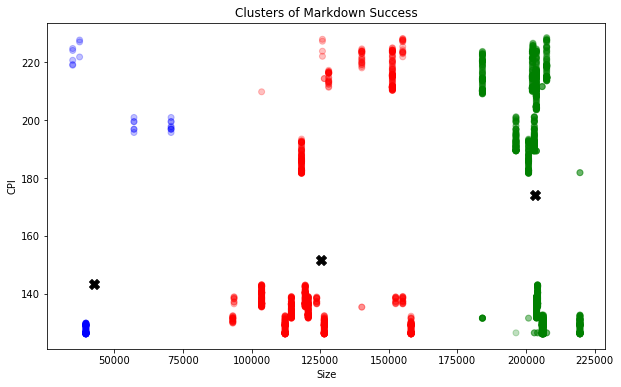

In [19]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Markdown Success
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_master[df_master.Markdown_Success==1][["Size","CPI"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Size",y="CPI", data=df_master[df_master.Markdown_Success==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Size")
plt.ylabel("CPI")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Markdown Success")
plt.show()